In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging()


import torch
import numpy as np
from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
%matplotlib inline

INFO:Please install tensorboardX: pip install tensorboardX

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


/bin/sh: line 1: sox: command not found
/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_metrics(data, k_min=1, k_max=9):
    x = np.array(data).reshape(-1, 1)
    ks_inertia = range(k_min, k_max + 1)
    ks_silhouette = range(max(2, k_min), k_max + 1)

    inertias = [KMeans(n_clusters=k, random_state=0).fit(x).inertia_ for k in ks_inertia]
    sil_scores = [silhouette_score(x, KMeans(n_clusters=k, random_state=0).fit_predict(x)) for k in ks_silhouette]

    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    
    axs[0].plot(ks_inertia, inertias, 'o-', color='blue')
    axs[0].set_xlabel('Number of Clusters (k)')
    axs[0].set_ylabel('Inertia')
    axs[0].set_title('Elbow Method for Optimal k')
    axs[0].grid(True)

    axs[1].plot(ks_silhouette, sil_scores, 'o-', color='green')
    axs[1].set_xlabel('Number of Clusters (k)')
    axs[1].set_ylabel('Silhouette Score')
    axs[1].set_title('Silhouette Score for Optimal k')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_1d_kmeans_scatter(data, k):
    x = np.array(data).reshape(-1, 1)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    labels = kmeans.labels_
    
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    plt.figure(figsize=(10, 2))
    for label, color in zip(unique_labels, colors):
        mask = labels == label
        plt.scatter(x[mask], [0]*np.sum(mask), color=color, label=f'Cluster {label}', s=10)
    
    plt.yticks([])
    plt.xlabel("x")
    plt.title(f"KMeans Clustering of 1D Data (k={k})")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()



In [3]:
model_names = [
    'whisper_tiny',
    'whisper_base',
    'wav2letter_modified',
    'wav2vec2',
    'speech2text',
    'deepspeech2',
    ]

threshold = 0.5
bin_width = 50
lag = 200
identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'

mVocs = True if 'mVocs' in identifier else False

In [4]:
dist_core = []
dist_non_primary = []
normalize_layer_ids=True
for i, model_name in enumerate(model_names):
    peak_layers, corr_dist = RegPlotter.get_dist_prefered_layer(
            model_name,
            identifier,
            bin_width=bin_width,
            mVocs=mVocs,
            threshold=threshold,
            normalize_layer_ids=normalize_layer_ids,
            )
    dist_core.extend(peak_layers['core'])
    dist_non_primary.extend(peak_layers['non-primary'])
    
number_of_channels = [len(dist_core), len(dist_non_primary)]
peak_layers = {'core': dist_core, 'non-primary': dist_non_primary}

INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
len(peak_layers['core'])

1800

In [ ]:
len(peak_layers['non-primary'])

624

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/

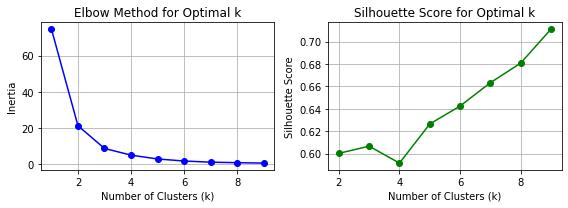

In [60]:
plot_kmeans_metrics(peak_layers['non-primary'])

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


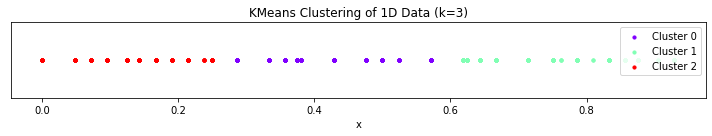

In [66]:
plot_1d_kmeans_scatter(peak_layers['non-primary'], k=3)

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/

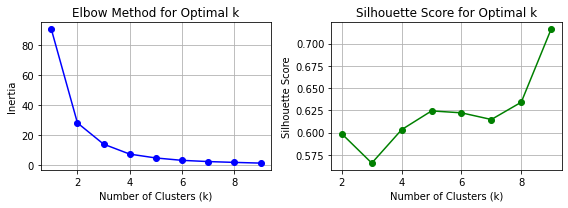

In [63]:
plot_kmeans_metrics(peak_layers['core'])

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


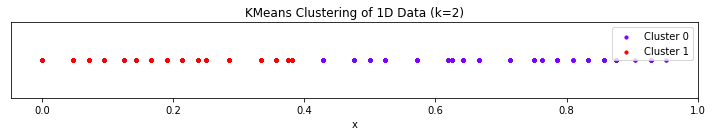

In [67]:
plot_1d_kmeans_scatter(peak_layers['core'], k=2)

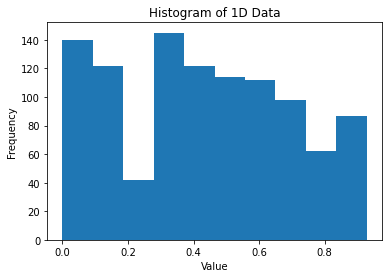

In [23]:
import matplotlib.pyplot as plt

x = peak_layers['non-primary']
# Assume `x` is your 1D data (a list or 1D numpy array)
plt.hist(x, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 1D Data')
plt.show()


In [46]:
from sklearn.cluster import DBSCAN
import numpy as np

x = peak_layers['non-primary']
# Make sure x is a NumPy array and reshape it to 2D
x = np.array(x).reshape(-1, 1)

db = DBSCAN(eps=0.07, min_samples=100).fit(x)
labels = db.labels_  # -1 means noise
np.unique(labels)

array([0, 1, 2])

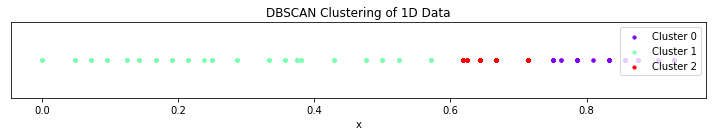

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `x` is already a 2D array and `labels` is from DBSCAN
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Create scatter plot
plt.figure(figsize=(10, 2))
for label, color in zip(unique_labels, colors):
    mask = labels == label
    plt.scatter(x[mask], [0]*np.sum(mask), color=color, label=f'Cluster {label}' if label != -1 else 'Noise', s=10)

plt.yticks([])
plt.xlabel("x")
plt.title("DBSCAN Clustering of 1D Data")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/

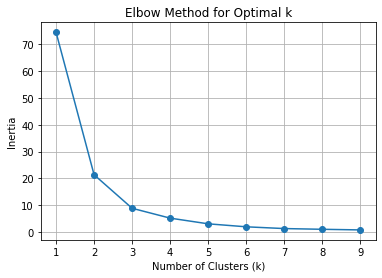

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

x = np.array(x).reshape(-1, 1)

inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/

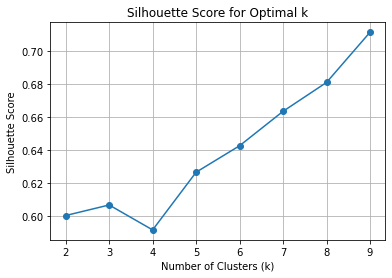

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Make sure x is a 2D numpy array
x = np.array(x).reshape(-1, 1)

sil_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    labels = kmeans.labels_
    score = silhouette_score(x, labels)
    sil_scores.append(score)

plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()


In [52]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
labels = kmeans.labels_

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


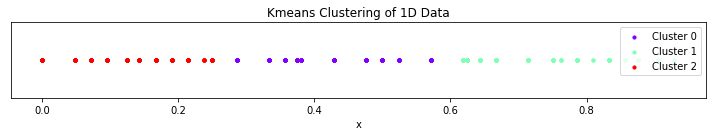

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `x` is already a 2D array and `labels` is from DBSCAN
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Create scatter plot
plt.figure(figsize=(10, 2))
for label, color in zip(unique_labels, colors):
    mask = labels == label
    plt.scatter(x[mask], [0]*np.sum(mask), color=color, label=f'Cluster {label}' if label != -1 else 'Noise', s=10)

plt.yticks([])
plt.xlabel("x")
plt.title("Kmeans Clustering of 1D Data")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()